In [1]:
import seaborn.objects as so
from seaborn import load_dataset
import polars as pl
fmri = load_dataset("fmri").filter(pl.col("region") == 'parietal')
seaice = pl.from_pandas(
    load_dataset("seaice").to_pandas()
    .assign(
        Day=lambda x: x["Date"].dt.day_of_year,
        Year=lambda x: x["Date"].dt.year,
    )
    .query("Year >= 1980")
    .astype({"Year": str})
    .pivot(index="Day", columns="Year", values="Extent")
    .filter(["1980", "2019"])
    .dropna()
    .reset_index()
)

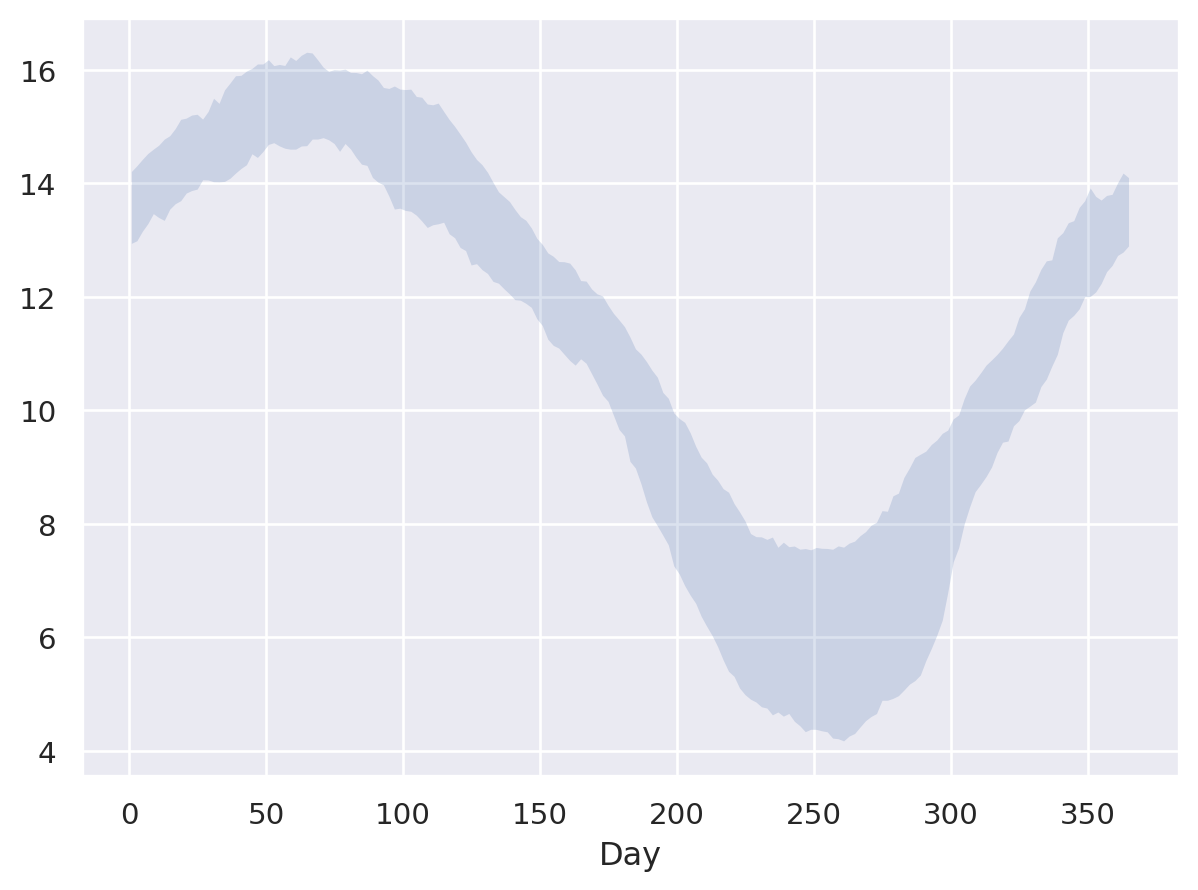

In [2]:
p = so.Plot(seaice, x="Day", ymin="1980", ymax="2019")
p.add(so.Band())

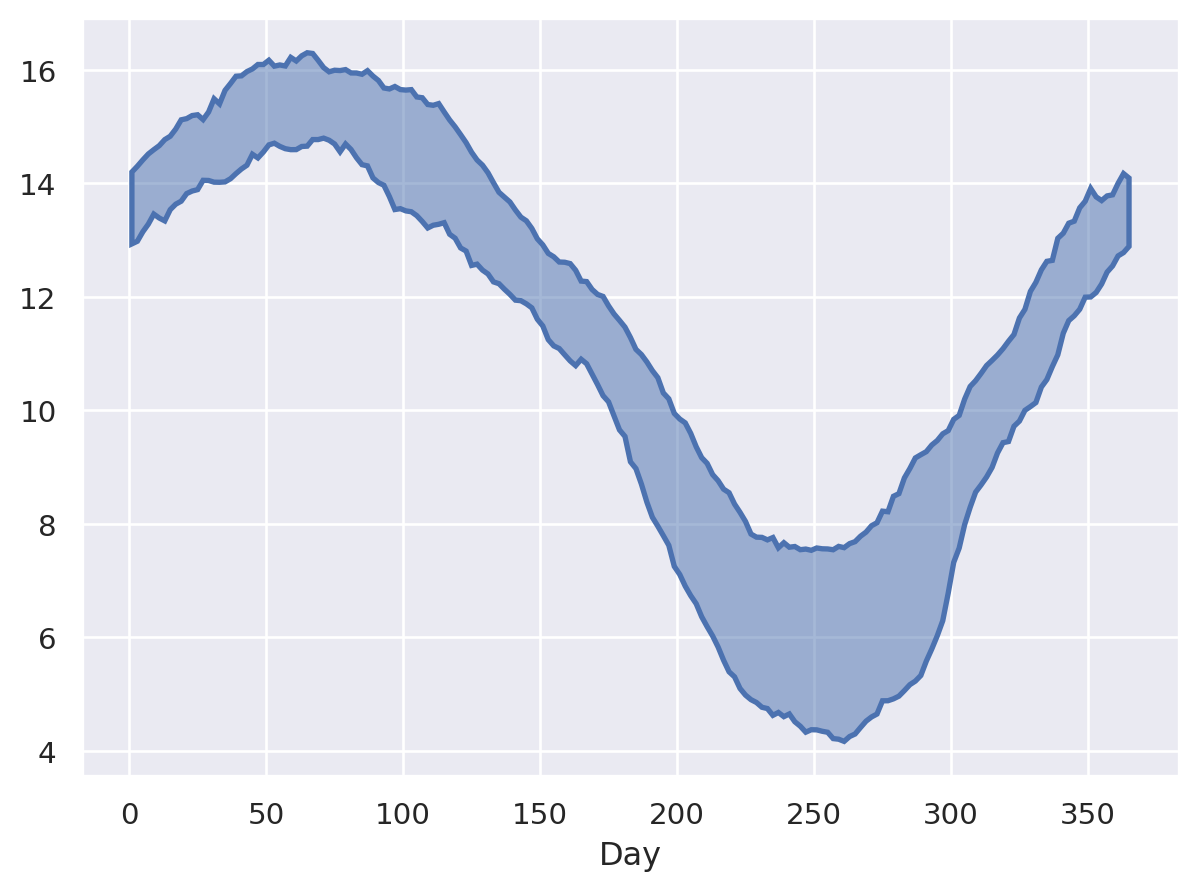

In [3]:
p.add(so.Band(alpha=.5, edgewidth=2))

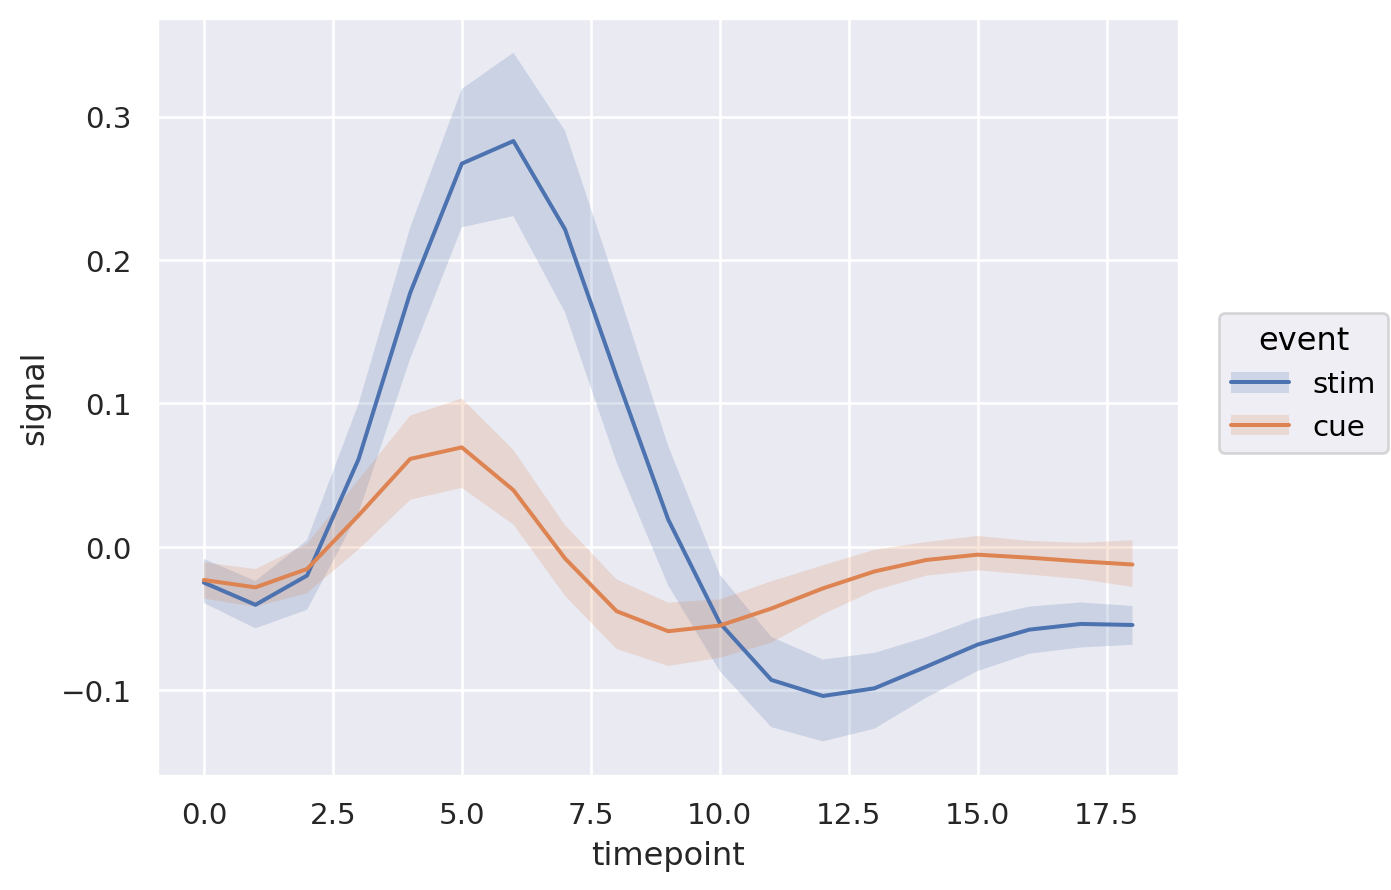

In [4]:
(
    so.Plot(fmri, x="timepoint", y="signal", color="event")
    .add(so.Band(), so.Est())
    .add(so.Line(), so.Agg())
)

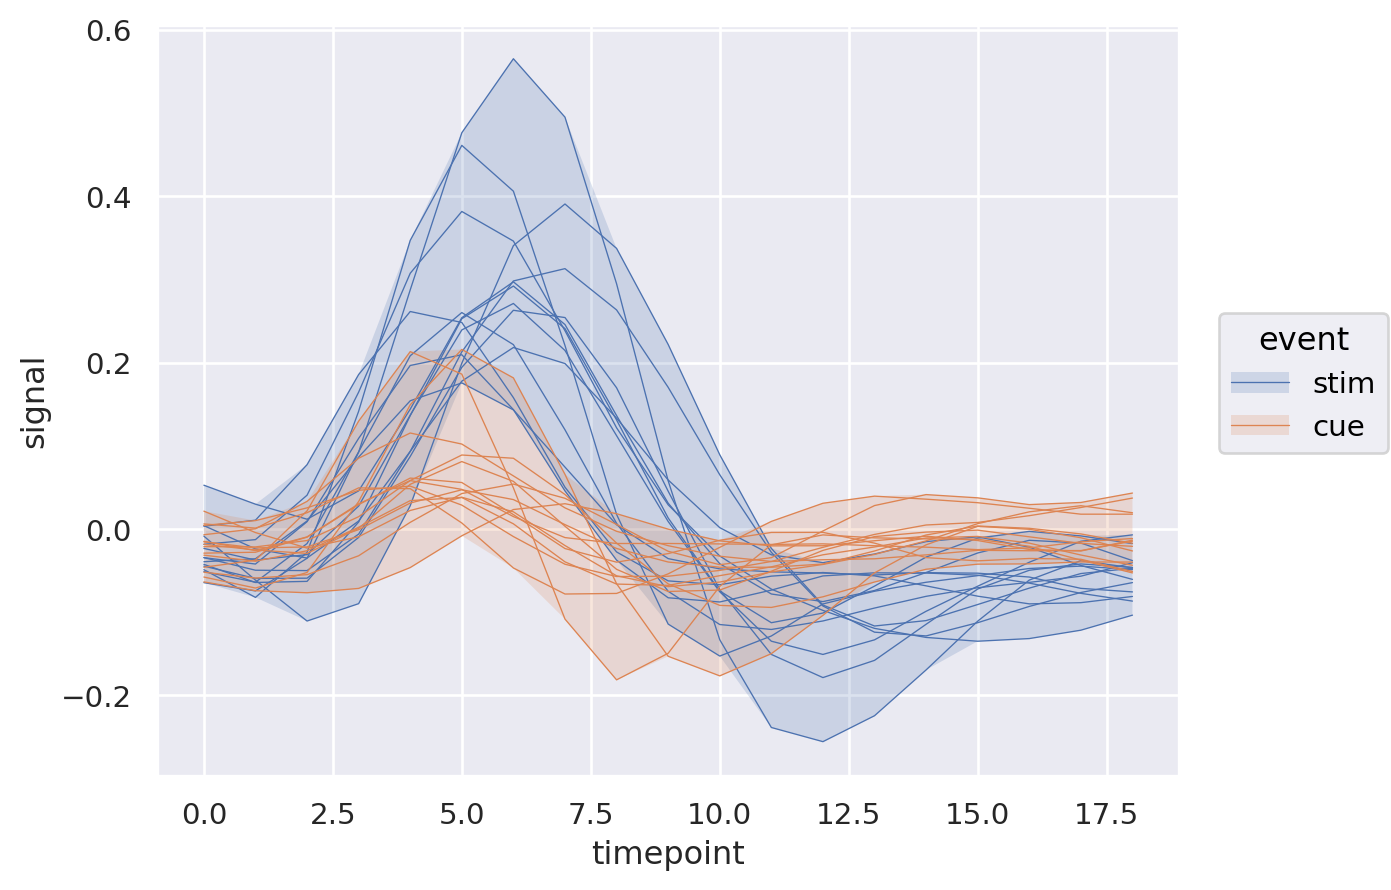

In [5]:
(
    so.Plot(fmri, x="timepoint", y="signal", color="event")
    .add(so.Line(linewidth=.5), group="subject")
    .add(so.Band())
)